### 지도학습 - 회귀모델 학습 추가 문제
    1. 데이터 전처리 3번 문제 : Diamonds Dataset을 이용한 가격 예측 모델 구현
    2. 데이터 전처리 5번 문제 : Red Wine Quality Dataset을 이용한 와인 품질 예측 모델 구현
> 여기서는 Red Wine Quality Dataset의 예측 모델만 구현

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 5번 문제 : Red Wine Quality Dataset을 이용한 와인 품질 예측 모델 구현

In [7]:
# winequality-red.csv 데이터셋 불러오기
df = pd.read_csv('winequality-red.csv')

df # 모든 데이터가 숫자형이다. -> 추가적인 인코딩이 필요없다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# 결측치가 있는지 확인
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# 통계 요약 정보 확인
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# 예측할 컬럼은 quality (0~10)
y = df['quality']

# 나머지가 입력 변수인 features
X = df.drop(columns='quality')

In [12]:
from sklearn.model_selection import train_test_split

# 훈련셋 80%, 테스트셋 20%로 나눔
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

In [13]:
from sklearn.preprocessing import StandardScaler

# 스케일링할 열 지정
scale_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 대해 fit + transform
X_train_scaled = X_train.copy()
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])

# 테스트 데이터에 대해 transform만 (fit X)
X_test_scaled = X_test.copy()
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])


In [14]:
# 실제 모델 학습

from sklearn.ensemble import RandomForestRegressor

# 모델 정의 및 학습
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
# 예측 및 평가


from sklearn.metrics import mean_squared_error, r2_score

# 예측 수행
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("▶ 평균제곱오차 (MSE):", mse)
print("▶ 결정계수 (R² Score):", r2)

▶ 평균제곱오차 (MSE): 0.3014340625
▶ 결정계수 (R² Score): 0.5387431372256011


C:\Users\ez\AppData\Local\Temp\ipykernel_17292\1117033816.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


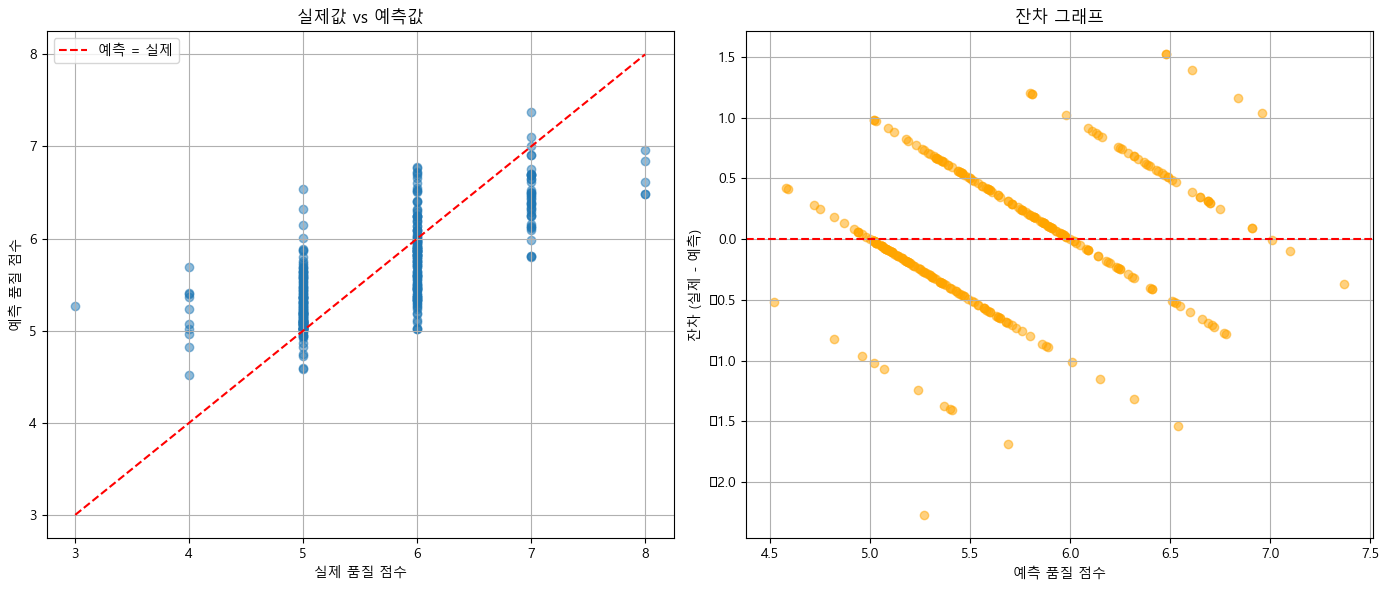

In [19]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 잔차 계산
residuals = y_test - y_pred

# 그래프 생성
plt.figure(figsize=(14, 6))

# --------------------------
# 1. 실제값 vs 예측값 그래프
# --------------------------
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
plt.scatter(y_test, y_pred, alpha=0.5)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='예측 = 실제')
plt.xlabel('실제 품질 점수')
plt.ylabel('예측 품질 점수')
plt.title('실제값 vs 예측값')
plt.legend()
plt.grid(True)

# --------------------------
# 2. 잔차 그래프
# --------------------------
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')  # 기준선 (잔차 = 0)
plt.xlabel('예측 품질 점수')
plt.ylabel('잔차 (실제 - 예측)')
plt.title('잔차 그래프')
plt.grid(True)

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()


- 점들이 대각선 근처에 몰려 있으면 모델이 잘 맞췄다는 의미!
    - 전체적으로는 나쁘지는 않지만 일부 편차 존재

- 예측에 전반적으로 큰 오차는 없지만, 특정 점수대에서는 편향이 존재